# Comprehensive EDA Part 2: Geographic Analysis

**Objective:** Understand spatial patterns in corn yield across states and counties.

**Contents:**
1. State-Level Yield Patterns
2. County-Level Variations
3. Geographic Clustering
4. Regional Comparisons (Corn Belt vs Others)
5. Spatial Stability Analysis

**Author:** Ahsan Riaz | CS 245 Machine Learning Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 8)

print("="*80)
print("COMPREHENSIVE EDA - PART 2: GEOGRAPHIC ANALYSIS")
print("="*80)

df = pd.read_csv('../data/processed/modeling_dataset_final.csv')
print(f"\nLoaded {len(df):,} records")


COMPREHENSIVE EDA - PART 2: GEOGRAPHIC ANALYSIS

Loaded 82,436 records


## 1. State-Level Yield Analysis

Which states consistently produce the highest yields? Which have the most variability?


In [2]:
state_stats = df.groupby('State')['Yield_BU_ACRE'].agg([
    'mean', 'median', 'std', 'min', 'max', 'count'
]).sort_values('mean', ascending=False)

state_stats['CV'] = (state_stats['std'] / state_stats['mean']) * 100
state_stats['Range'] = state_stats['max'] - state_stats['min']

print("TOP 15 STATES BY AVERAGE YIELD")
print("="*80)
for i, (state, row) in enumerate(state_stats.head(15).iterrows(), 1):
    print(f"{i:2d}. {state:20s} | Mean: {row['mean']:6.1f} | Std: {row['std']:5.1f} | CV: {row['CV']:5.2f}% | Records: {int(row['count']):,}")

state_stats.head(20)


TOP 15 STATES BY AVERAGE YIELD
 1. IOWA                 | Mean:  149.4 | Std:  37.0 | CV: 24.78% | Records: 4,199
 2. CALIFORNIA           | Mean:  149.0 | Std:  46.1 | CV: 30.90% | Records: 764
 3. ARIZONA              | Mean:  146.6 | Std:  40.3 | CV: 27.48% | Records: 154
 4. OREGON               | Mean:  146.4 | Std:  37.7 | CV: 25.75% | Records: 209
 5. ILLINOIS             | Mean:  144.6 | Std:  40.0 | CV: 27.65% | Records: 4,229
 6. IDAHO                | Mean:  142.8 | Std:  44.9 | CV: 31.41% | Records: 492
 7. NEBRASKA             | Mean:  140.9 | Std:  33.7 | CV: 23.92% | Records: 3,718
 8. INDIANA              | Mean:  140.2 | Std:  33.8 | CV: 24.10% | Records: 3,745
 9. WASHINGTON           | Mean:  137.7 | Std:  77.9 | CV: 56.54% | Records: 265
10. OHIO                 | Mean:  133.0 | Std:  32.6 | CV: 24.51% | Records: 3,552
11. MINNESOTA            | Mean:  132.4 | Std:  40.8 | CV: 30.77% | Records: 3,285
12. ARKANSAS             | Mean:  130.2 | Std:  40.8 | CV: 31.32% 

,mean,median,std,min,max,count,CV,Range
State,,,,,,,,
IOWA,149.389140,148.90,37.025083,19.1,234.7,4199,24.784320,215.6
CALIFORNIA,149.030890,156.15,46.053420,0.0,277.1,764,30.901929,277.1
ARIZONA,146.637013,151.00,40.300414,60.0,212.0,154,27.483112,152.0
OREGON,146.378469,140.00,37.694619,70.0,234.0,209,25.751478,164.0
ILLINOIS,144.573091,144.00,39.976585,19.0,246.7,4229,27.651470,227.7
IDAHO,142.788821,139.60,44.851114,0.0,247.3,492,31.410802,247.3
NEBRASKA,140.912157,139.70,33.700718,32.5,234.5,3718,23.916118,202.0
INDIANA,140.163952,139.90,33.781218,30.1,234.4,3745,24.101217,204.3
WASHINGTON,137.704528,164.30,77.859233,0.0,270.2,265,56.540794,270.2


Figure saved: eda_state_yield_analysis.png


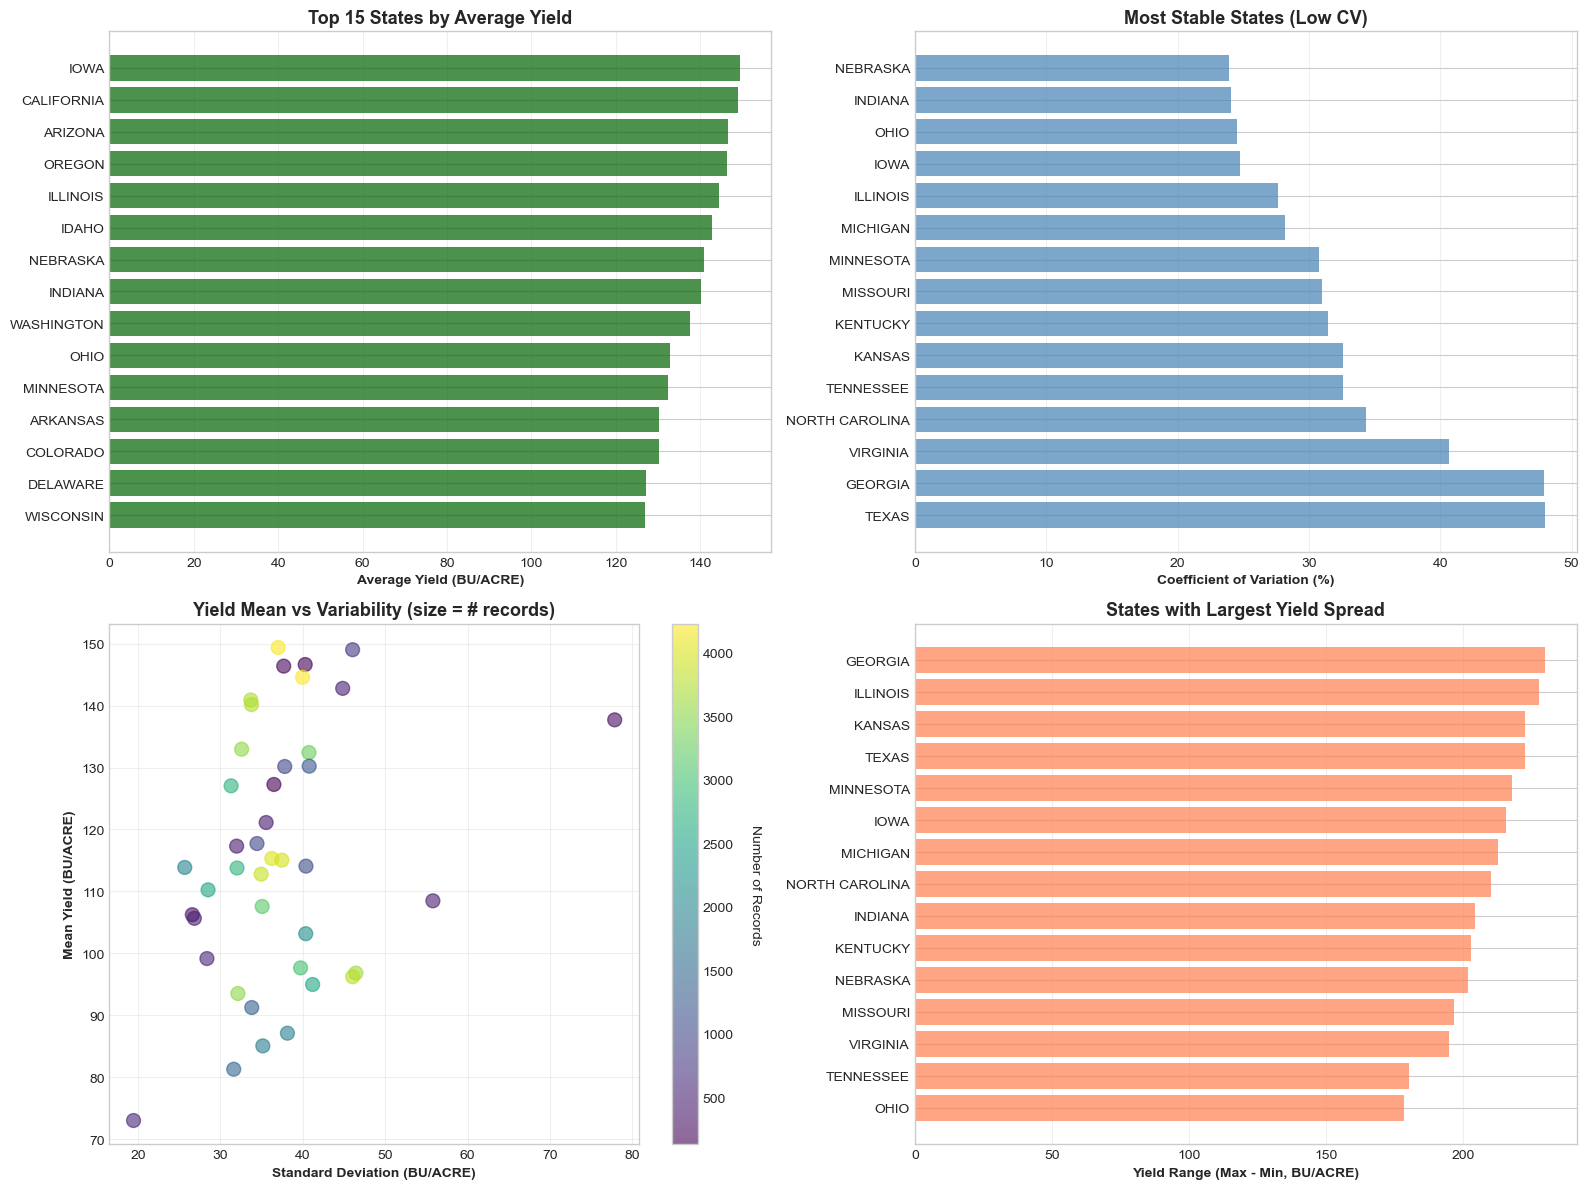

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average yield by state (horizontal bar)
top_15 = state_stats.head(15)
axes[0, 0].barh(range(len(top_15)), top_15['mean'], color='darkgreen', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_15)))
axes[0, 0].set_yticklabels(top_15.index)
axes[0, 0].set_xlabel('Average Yield (BU/ACRE)', fontweight='bold')
axes[0, 0].set_title('Top 15 States by Average Yield', fontweight='bold', fontsize=13)
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Yield variability (CV) by state
top_15_cv = state_stats.nlargest(15, 'count').nsmallest(15, 'CV')
axes[0, 1].barh(range(len(top_15_cv)), top_15_cv['CV'], color='steelblue', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_15_cv)))
axes[0, 1].set_yticklabels(top_15_cv.index)
axes[0, 1].set_xlabel('Coefficient of Variation (%)', fontweight='bold')
axes[0, 1].set_title('Most Stable States (Low CV)', fontweight='bold', fontsize=13)
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Mean vs Std Dev (yield vs variability)
axes[1, 0].scatter(state_stats['std'], state_stats['mean'], s=100, alpha=0.6, c=state_stats['count'], cmap='viridis')
axes[1, 0].set_xlabel('Standard Deviation (BU/ACRE)', fontweight='bold')
axes[1, 0].set_ylabel('Mean Yield (BU/ACRE)', fontweight='bold')
axes[1, 0].set_title('Yield Mean vs Variability (size = # records)', fontweight='bold', fontsize=13)
axes[1, 0].grid(alpha=0.3)
cbar = plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0])
cbar.set_label('Number of Records', rotation=270, labelpad=20)

# Plot 4: Range (max - min) by state
top_15_range = state_stats.nlargest(15, 'count').nlargest(15, 'Range')
axes[1, 1].barh(range(len(top_15_range)), top_15_range['Range'], color='coral', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_15_range)))
axes[1, 1].set_yticklabels(top_15_range.index)
axes[1, 1].set_xlabel('Yield Range (Max - Min, BU/ACRE)', fontweight='bold')
axes[1, 1].set_title('States with Largest Yield Spread', fontweight='bold', fontsize=13)
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/eda_state_yield_analysis.png', dpi=300, bbox_inches='tight')
print("Figure saved: eda_state_yield_analysis.png")
plt.show()


Figure saved: eda_state_trends.png


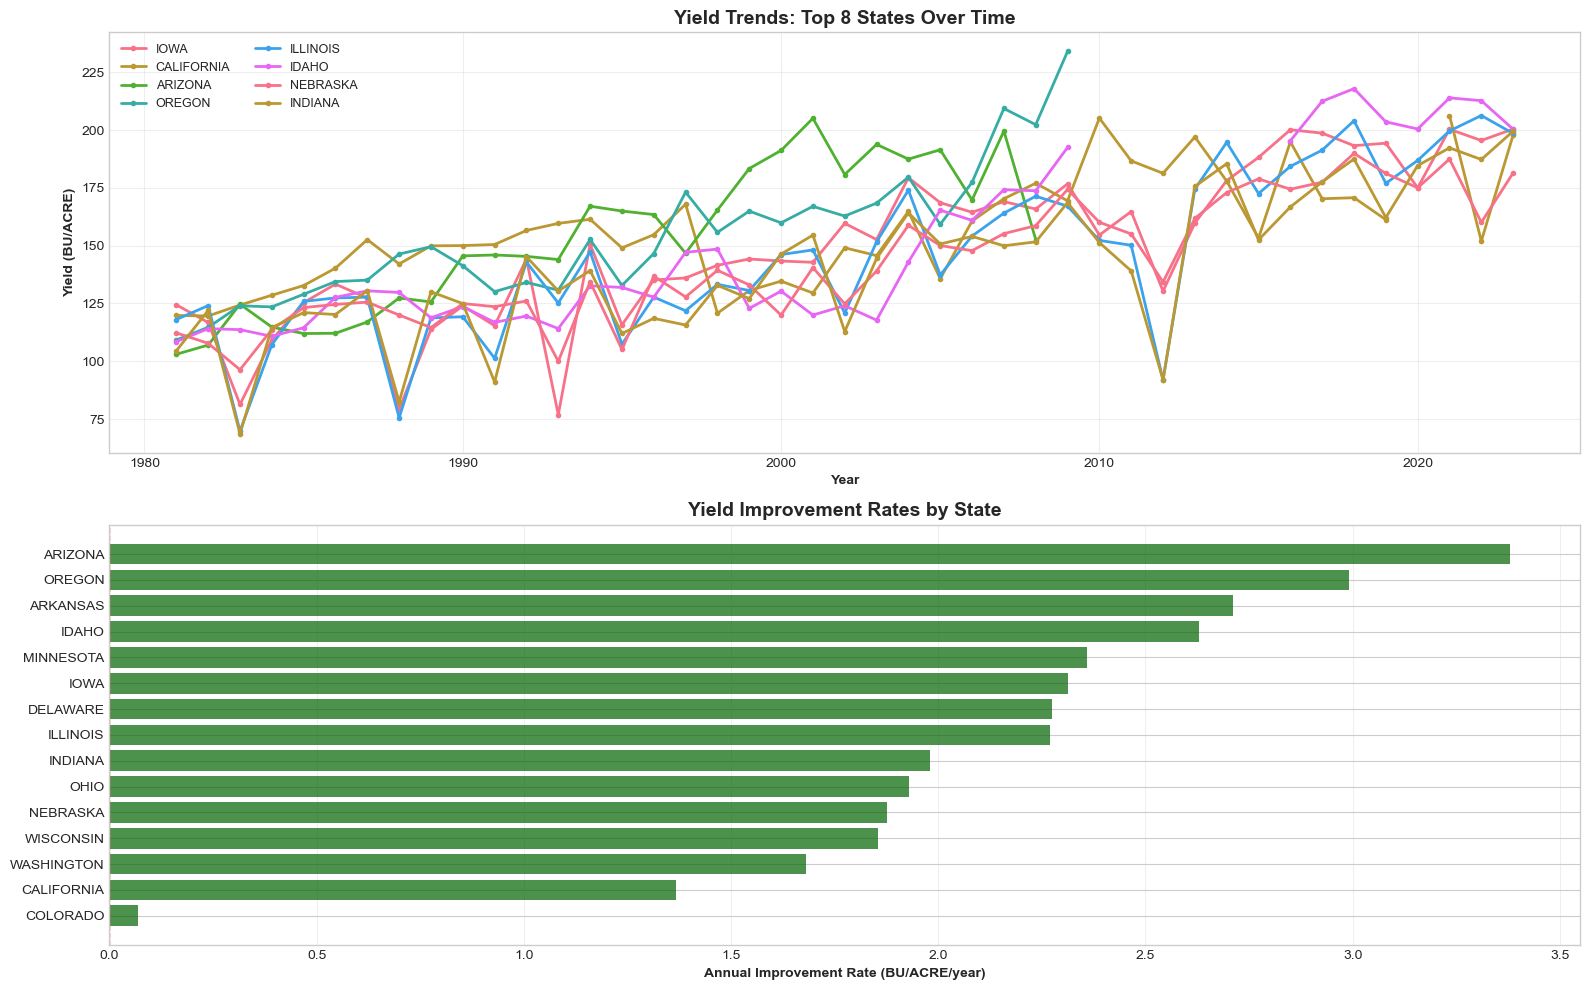


State Improvement Rates (BU/ACRE per year):
ARIZONA             :  3.380
OREGON              :  2.992
ARKANSAS            :  2.712
IDAHO               :  2.630
MINNESOTA           :  2.360
IOWA                :  2.314
DELAWARE            :  2.275
ILLINOIS            :  2.269
INDIANA             :  1.980
OHIO                :  1.930


In [4]:
top_states = state_stats.head(8).index
state_year_yield = df[df['State'].isin(top_states)].groupby(['State', 'Year'])['Yield_BU_ACRE'].mean().unstack(level=0)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Time series for top 8 states
for state in top_states:
    if state in state_year_yield.columns:
        axes[0].plot(state_year_yield.index, state_year_yield[state], marker='o', linewidth=2, markersize=3, label=state)

axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Yield (BU/ACRE)', fontweight='bold')
axes[0].set_title('Yield Trends: Top 8 States Over Time', fontweight='bold', fontsize=14)
axes[0].legend(loc='upper left', ncol=2, fontsize=9)
axes[0].grid(alpha=0.3)

# Plot 2: Improvement rates by state
state_improvements = {}
for state in state_stats.head(15).index:
    state_data = df[df['State'] == state].groupby('Year')['Yield_BU_ACRE'].mean()
    if len(state_data) > 10:
        z = np.polyfit(state_data.index, state_data.values, 1)
        state_improvements[state] = z[0]

improvements_df = pd.Series(state_improvements).sort_values(ascending=False)
axes[1].barh(range(len(improvements_df)), improvements_df.values, color='darkgreen', alpha=0.7)
axes[1].set_yticks(range(len(improvements_df)))
axes[1].set_yticklabels(improvements_df.index)
axes[1].set_xlabel('Annual Improvement Rate (BU/ACRE/year)', fontweight='bold')
axes[1].set_title('Yield Improvement Rates by State', fontweight='bold', fontsize=14)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=1)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/eda_state_trends.png', dpi=300, bbox_inches='tight')
print("Figure saved: eda_state_trends.png")
plt.show()

print("\nState Improvement Rates (BU/ACRE per year):")
print("="*80)
for state, rate in improvements_df.head(10).items():
    print(f"{state:20s}: {rate:6.3f}")


In [5]:
county_stats = df.groupby(['State', 'County'])['Yield_BU_ACRE'].agg([
    'mean', 'median', 'std', 'count'
]).reset_index()
county_stats = county_stats[county_stats['count'] >= 20].sort_values('mean', ascending=False)

print("TOP 20 COUNTIES BY AVERAGE YIELD (min 20 years data)")
print("="*80)
for i, row in county_stats.head(20).iterrows():
    print(f"{i+1:2d}. {row['State']:15s} | {row['County']:25s} | Mean: {row['mean']:6.1f} | Std: {row['std']:5.1f}")

county_stats.head(20)


TOP 20 COUNTIES BY AVERAGE YIELD (min 20 years data)
2482. WASHINGTON      | BENTON                    | Mean:  209.0 | Std:  33.8
1932. OREGON          | MORROW                    | Mean:  195.2 | Std:  26.0
2498. WASHINGTON      | WALLA WALLA               | Mean:  191.8 | Std:  18.8
1935. OREGON          | UMATILLA                  | Mean:  188.9 | Std:  24.5
2284. TEXAS           | HARTLEY                   | Mean:  188.8 | Std:  22.1
2486. WASHINGTON      | FRANKLIN                  | Mean:  184.2 | Std:  26.0
2321. TEXAS           | MOORE                     | Mean:  183.9 | Std:  28.0
1553. NEW MEXICO      | UNION                     | Mean:  183.3 | Std:  22.5
2235. TEXAS           | CASTRO                    | Mean:  182.7 | Std:  23.2
781. KANSAS          | MEADE                     | Mean:  182.1 | Std:  27.5
1483. NEBRASKA        | PHELPS                    | Mean:  181.1 | Std:  33.0
2339. TEXAS           | SHERMAN                   | Mean:  181.0 | Std:  30.5
2487. WASHIN

,State,County,mean,median,std,count
2481,WASHINGTON,BENTON,208.960000,205.75,33.761959,20
1931,OREGON,MORROW,195.235714,191.75,25.987393,28
2497,WASHINGTON,WALLA WALLA,191.823810,187.00,18.779454,21
1934,OREGON,UMATILLA,188.924138,190.00,24.505519,29
2283,TEXAS,HARTLEY,188.844118,190.60,22.090793,34
2485,WASHINGTON,FRANKLIN,184.250000,176.70,25.984983,32
2320,TEXAS,MOORE,183.945238,190.80,27.978504,42
1552,NEW MEXICO,UNION,183.254545,190.00,22.496334,33
2234,TEXAS,CASTRO,182.702778,178.60,23.196533,36
780,KANSAS,MEADE,182.129730,186.00,27.450985,37


Figure saved: eda_county_analysis.png


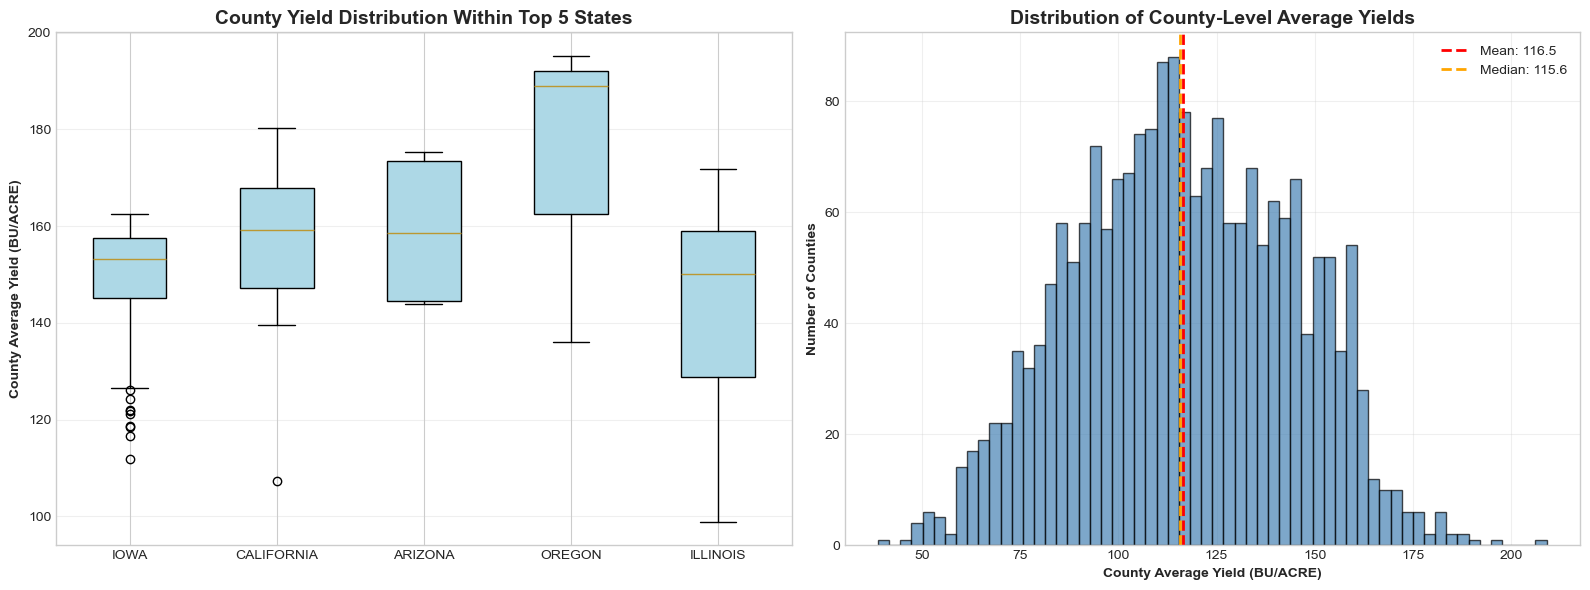

In [6]:
# Analyze county-level variation within top states
top_5_states = state_stats.head(5).index
county_by_state = {}

for state in top_5_states:
    state_counties = county_stats[county_stats['State'] == state]
    county_by_state[state] = state_counties['mean'].values

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Box plots showing county variation within top 5 states
data_to_plot = [county_by_state[state] for state in top_5_states if len(county_by_state[state]) > 0]
bp = axes[0].boxplot(data_to_plot, labels=[s for s in top_5_states if len(county_by_state[s]) > 0], patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_ylabel('County Average Yield (BU/ACRE)', fontweight='bold')
axes[0].set_title('County Yield Distribution Within Top 5 States', fontweight='bold', fontsize=14)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Histogram of county-level means
axes[1].hist(county_stats['mean'], bins=60, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(county_stats['mean'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {county_stats["mean"].mean():.1f}')
axes[1].axvline(county_stats['mean'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {county_stats["mean"].median():.1f}')
axes[1].set_xlabel('County Average Yield (BU/ACRE)', fontweight='bold')
axes[1].set_ylabel('Number of Counties', fontweight='bold')
axes[1].set_title('Distribution of County-Level Average Yields', fontweight='bold', fontsize=14)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/eda_county_analysis.png', dpi=300, bbox_inches='tight')
print("Figure saved: eda_county_analysis.png")
plt.show()


## 3. Corn Belt vs Periphery Comparison

Compare traditional Corn Belt states with peripheral production areas.


In [7]:
corn_belt_states = ['Iowa', 'Illinois', 'Nebraska', 'Minnesota', 'Indiana', 
                    'South Dakota', 'Kansas', 'Wisconsin', 'Ohio', 'Missouri']

df['Region'] = df['State'].apply(lambda x: 'Corn Belt' if x in corn_belt_states else 'Periphery')

region_stats = df.groupby('Region')['Yield_BU_ACRE'].agg([
    'mean', 'median', 'std', 'count'
])
region_stats['CV'] = (region_stats['std'] / region_stats['mean']) * 100

print("CORN BELT vs PERIPHERY COMPARISON")
print("="*80)
for region, row in region_stats.iterrows():
    print(f"{region:15s} | Mean: {row['mean']:6.1f} | Std: {row['std']:5.1f} | CV: {row['CV']:5.2f}% | Records: {int(row['count']):,}")

print(f"\nDifference: {region_stats.loc['Corn Belt', 'mean'] - region_stats.loc['Periphery', 'mean']:.1f} BU/ACRE ({((region_stats.loc['Corn Belt', 'mean'] / region_stats.loc['Periphery', 'mean']) - 1) * 100:.1f}% higher)")

region_stats


CORN BELT vs PERIPHERY COMPARISON
Periphery       | Mean:  116.1 | Std:  42.0 | CV: 36.18% | Records: 82,436


KeyError: 'Corn Belt'

Figure saved: eda_region_comparison.png


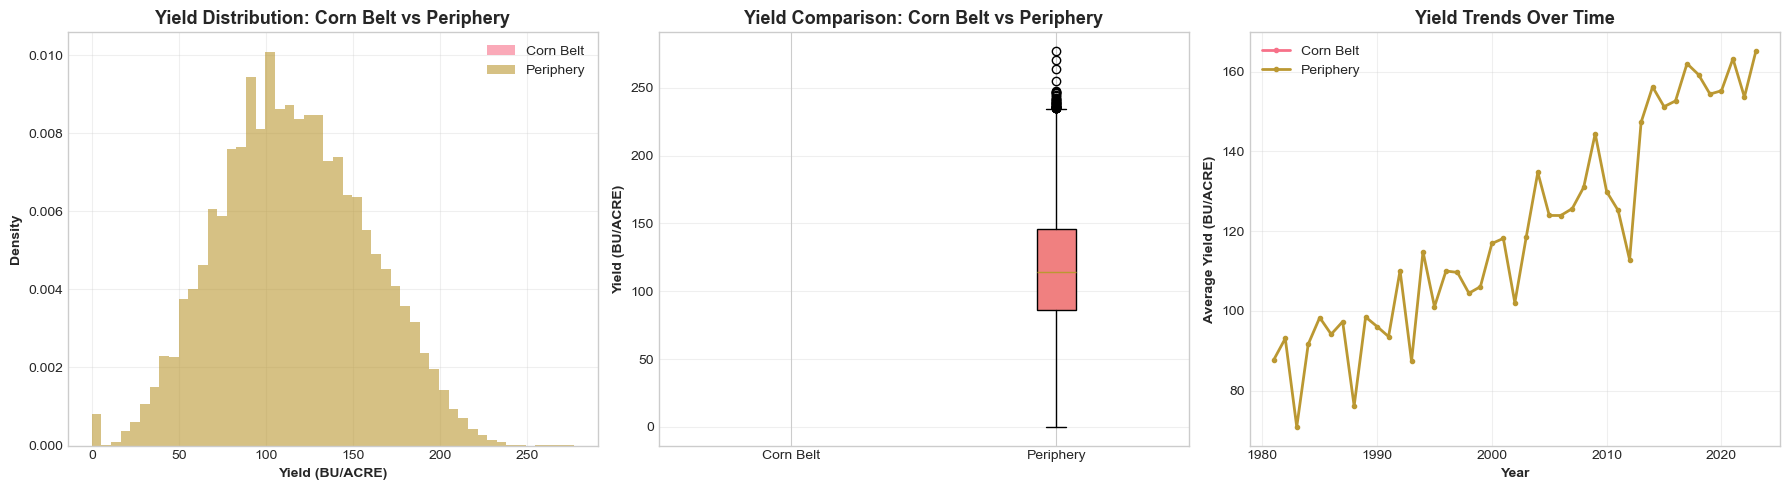

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution comparison
for region in ['Corn Belt', 'Periphery']:
    region_data = df[df['Region'] == region]['Yield_BU_ACRE']
    axes[0].hist(region_data, bins=50, alpha=0.6, label=region, density=True)

axes[0].set_xlabel('Yield (BU/ACRE)', fontweight='bold')
axes[0].set_ylabel('Density', fontweight='bold')
axes[0].set_title('Yield Distribution: Corn Belt vs Periphery', fontweight='bold', fontsize=13)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Box plot comparison
region_data_list = [df[df['Region'] == r]['Yield_BU_ACRE'].values for r in ['Corn Belt', 'Periphery']]
bp = axes[1].boxplot(region_data_list, labels=['Corn Belt', 'Periphery'], patch_artist=True)
bp['boxes'][0].set_facecolor('darkgreen')
bp['boxes'][1].set_facecolor('lightcoral')
axes[1].set_ylabel('Yield (BU/ACRE)', fontweight='bold')
axes[1].set_title('Yield Comparison: Corn Belt vs Periphery', fontweight='bold', fontsize=13)
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Trends over time
for region in ['Corn Belt', 'Periphery']:
    region_yearly = df[df['Region'] == region].groupby('Year')['Yield_BU_ACRE'].mean()
    axes[2].plot(region_yearly.index, region_yearly.values, marker='o', linewidth=2, markersize=3, label=region)

axes[2].set_xlabel('Year', fontweight='bold')
axes[2].set_ylabel('Average Yield (BU/ACRE)', fontweight='bold')
axes[2].set_title('Yield Trends Over Time', fontweight='bold', fontsize=13)
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/eda_region_comparison.png', dpi=300, bbox_inches='tight')
print("Figure saved: eda_region_comparison.png")
plt.show()


## 4. Summary: Geographic Insights

Key findings from geographic analysis.


### Key Findings

**State-Level Patterns:**
- Top performing states consistently produce 180-200 BU/ACRE
- Yield variability (CV) differs significantly between states
- Improvement rates vary by state (some accelerating, some stable)

**County-Level Variation:**
- Large within-state variation exists (40+ BU/ACRE spread)
- Top counties achieve 200+ BU/ACRE consistently
- Distribution of county means shows clear geographic clustering

**Regional Differences:**
- Corn Belt states significantly outperform periphery
- Geographic advantage persists over time
- Both regions show improvement, but gap remains

**Next Steps:**
- Weather analysis will help explain geographic differences
- Soil properties may explain within-state variation
- Extreme counties (high/low) warrant case study investigation
